In [67]:
import pandas as pd
import numpy as np 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
df=pd.read_csv("covtype.data")
df.head()

2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225  ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121  ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211  ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172  ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031  ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  
0     0     0     0     0     0     0  5  
1     0     0     0     0     0     0  2  
2     0     0     0     0     0     0  2  
3     0     0     0     0     0     0  5  
4     0     0     0     0     0     0  2  

[5 rows x 55 columns]

In [69]:
columnas=["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am ", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
for i in range(1, 5):
    columnas.append("Wilderness_Area" + str(i))
for i in range(1, 41):
    columnas.append("Soil_Type" + str(i))
columnas.append("Cover_Type")
df.columns=columnas
df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2590      56      2                               212   
1            2804     139      9                               268   
2            2785     155     18                               242   
3            2595      45      2                               153   
4            2579     132      6                               300   
...           ...     ...    ...                               ...   
581006       2396     153     20                                85   
581007       2391     152     19                                67   
581008       2386     159     17                                60   
581009       2384     170     15                                60   
581010       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   -6                              390   
1                                   65                             3180   
2                                  118                             3090   
3                                   -1                              391   
4                                  -15                               67   
...                                ...                              ...   
581006                              17                              108   
581007                              12                               95   
581008                               7                               90   
581009                               5                               90   
581010                               4                               67   

        Hillshade_9am   Hillshade_Noon  Hillshade_3pm  \
0                  220             235            151   
1                  234             238            135   
2                  238             238            122   
3                  220             234            150   
4                  230             237            140   
...                ...             ...            ...   
581006             240             237            118   
581007             240             237            119   
581008             236             241            130   
581009             230             245            143   
581010             231             244            141   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                     6225  ...            0            0   
1                                     6121  ...            0            0   
2                                     6211  ...            0            0   
3                                     6172  ...            0            0   
4                                     6031  ...            0            0   
...                                    ...  ...          ...          ...   
581006                                 837  ...            0            0   
581007                                 845  ...            0            0   
581008                                 854  ...            0            0   
581009                                 864  ...            0            0   
581010                                 875  ...            0            0   

        Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0                 0            0            0            0            0   
1                 0            0            0            0            0   
2                 0            0            0            0            0   
3                 0            0            0            0            0   
4                 0            0            0            0            0   
...             ...          ...          ...          ...          ...   
581006            0            0            0            0            0   
581007            0            0            0           

EJERCICIO 1:
Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante las importancias de cada variable (Decision Trees Importances):

Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
random_state=100

In [70]:
from sklearn.tree import DecisionTreeRegressor

x=df.iloc[:, 0: -1]
y=df.iloc[:, -1]

modelo=DecisionTreeRegressor(random_state=100)
modelo.fit(x, y)



importancias=modelo.feature_importances_
indices_ordenados=np.argsort(importancias)[::-1]


importancias_acumuladas=np.cumsum(importancias[indices_ordenados])
indices_elegidos=indices_ordenados[:np.argmax(importancias_acumuladas>=0.95)+1]
variables_elegidas=df.columns[indices_elegidos]
df_filtrado=df[variables_elegidas]
df_filtrado["Cover_Type"]=y

df_filtrado


C:\Users\ajunq\AppData\Local\Temp\ipykernel_18296\2442069360.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Cover_Type"]=y


Elevation  Horizontal_Distance_To_Fire_Points  \
0            2590                                6225   
1            2804                                6121   
2            2785                                6211   
3            2595                                6172   
4            2579                                6031   
...           ...                                 ...   
581006       2396                                 837   
581007       2391                                 845   
581008       2386                                 854   
581009       2384                                 864   
581010       2383                                 875   

        Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                                   390                               212   
1                                  3180                               268   
2                                  3090                               242   
3                                   391                               153   
4                                    67                               300   
...                                 ...                               ...   
581006                              108                                85   
581007                               95                                67   
581008                               90                                60   
581009                               90                                60   
581010                               67                                60   

        Vertical_Distance_To_Hydrology  Wilderness_Area3  Soil_Type32  \
0                                   -6                 0            0   
1                                   65                 0            0   
2                                  118                 0            0   
3                                   -1                 0            0   
4                                  -15                 0            0   
...                                ...               ...          ...   
581006                              17                 1            0   
581007                              12                 1            0   
581008                               7                 1            0   
581009                               5                 1            0   
581010                               4                 1            0   

        Hillshade_9am   Hillshade_Noon  Aspect  Wilderness_Area1  \
0                  220             235      56                 1   
1                  234             238     139                 1   
2                  238             238     155                 1   
3                  220             234      45                 1   
4                  230             237     132                 1   
...                ...             ...     ...               ...   
581006             240             237     153                 0   
581007             240             237     152                 0   
581008             236             241     159                 0   
581009             230             245     170                 0   
581010             231             244     165                 0   

        Hillshade_3pm  Soil_Type39  Slope  Wilderness_Area2  Soil_Type38  \
0                 151            0      2                 0            0   
1                 135            0      9                 0            0   
2                 122            0     18                 0            0   
3                 150            0      2                 0            0   
4                 140            0      6                 0            0   
...               ...          ...    ...               ...          ...   
581006            118            0     20                 0            0   
581007            119            0     19                 0            0   
581008            13

Ejercicio 2

Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

LLevar las variables de entrada a una escala de 0 a 1
Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

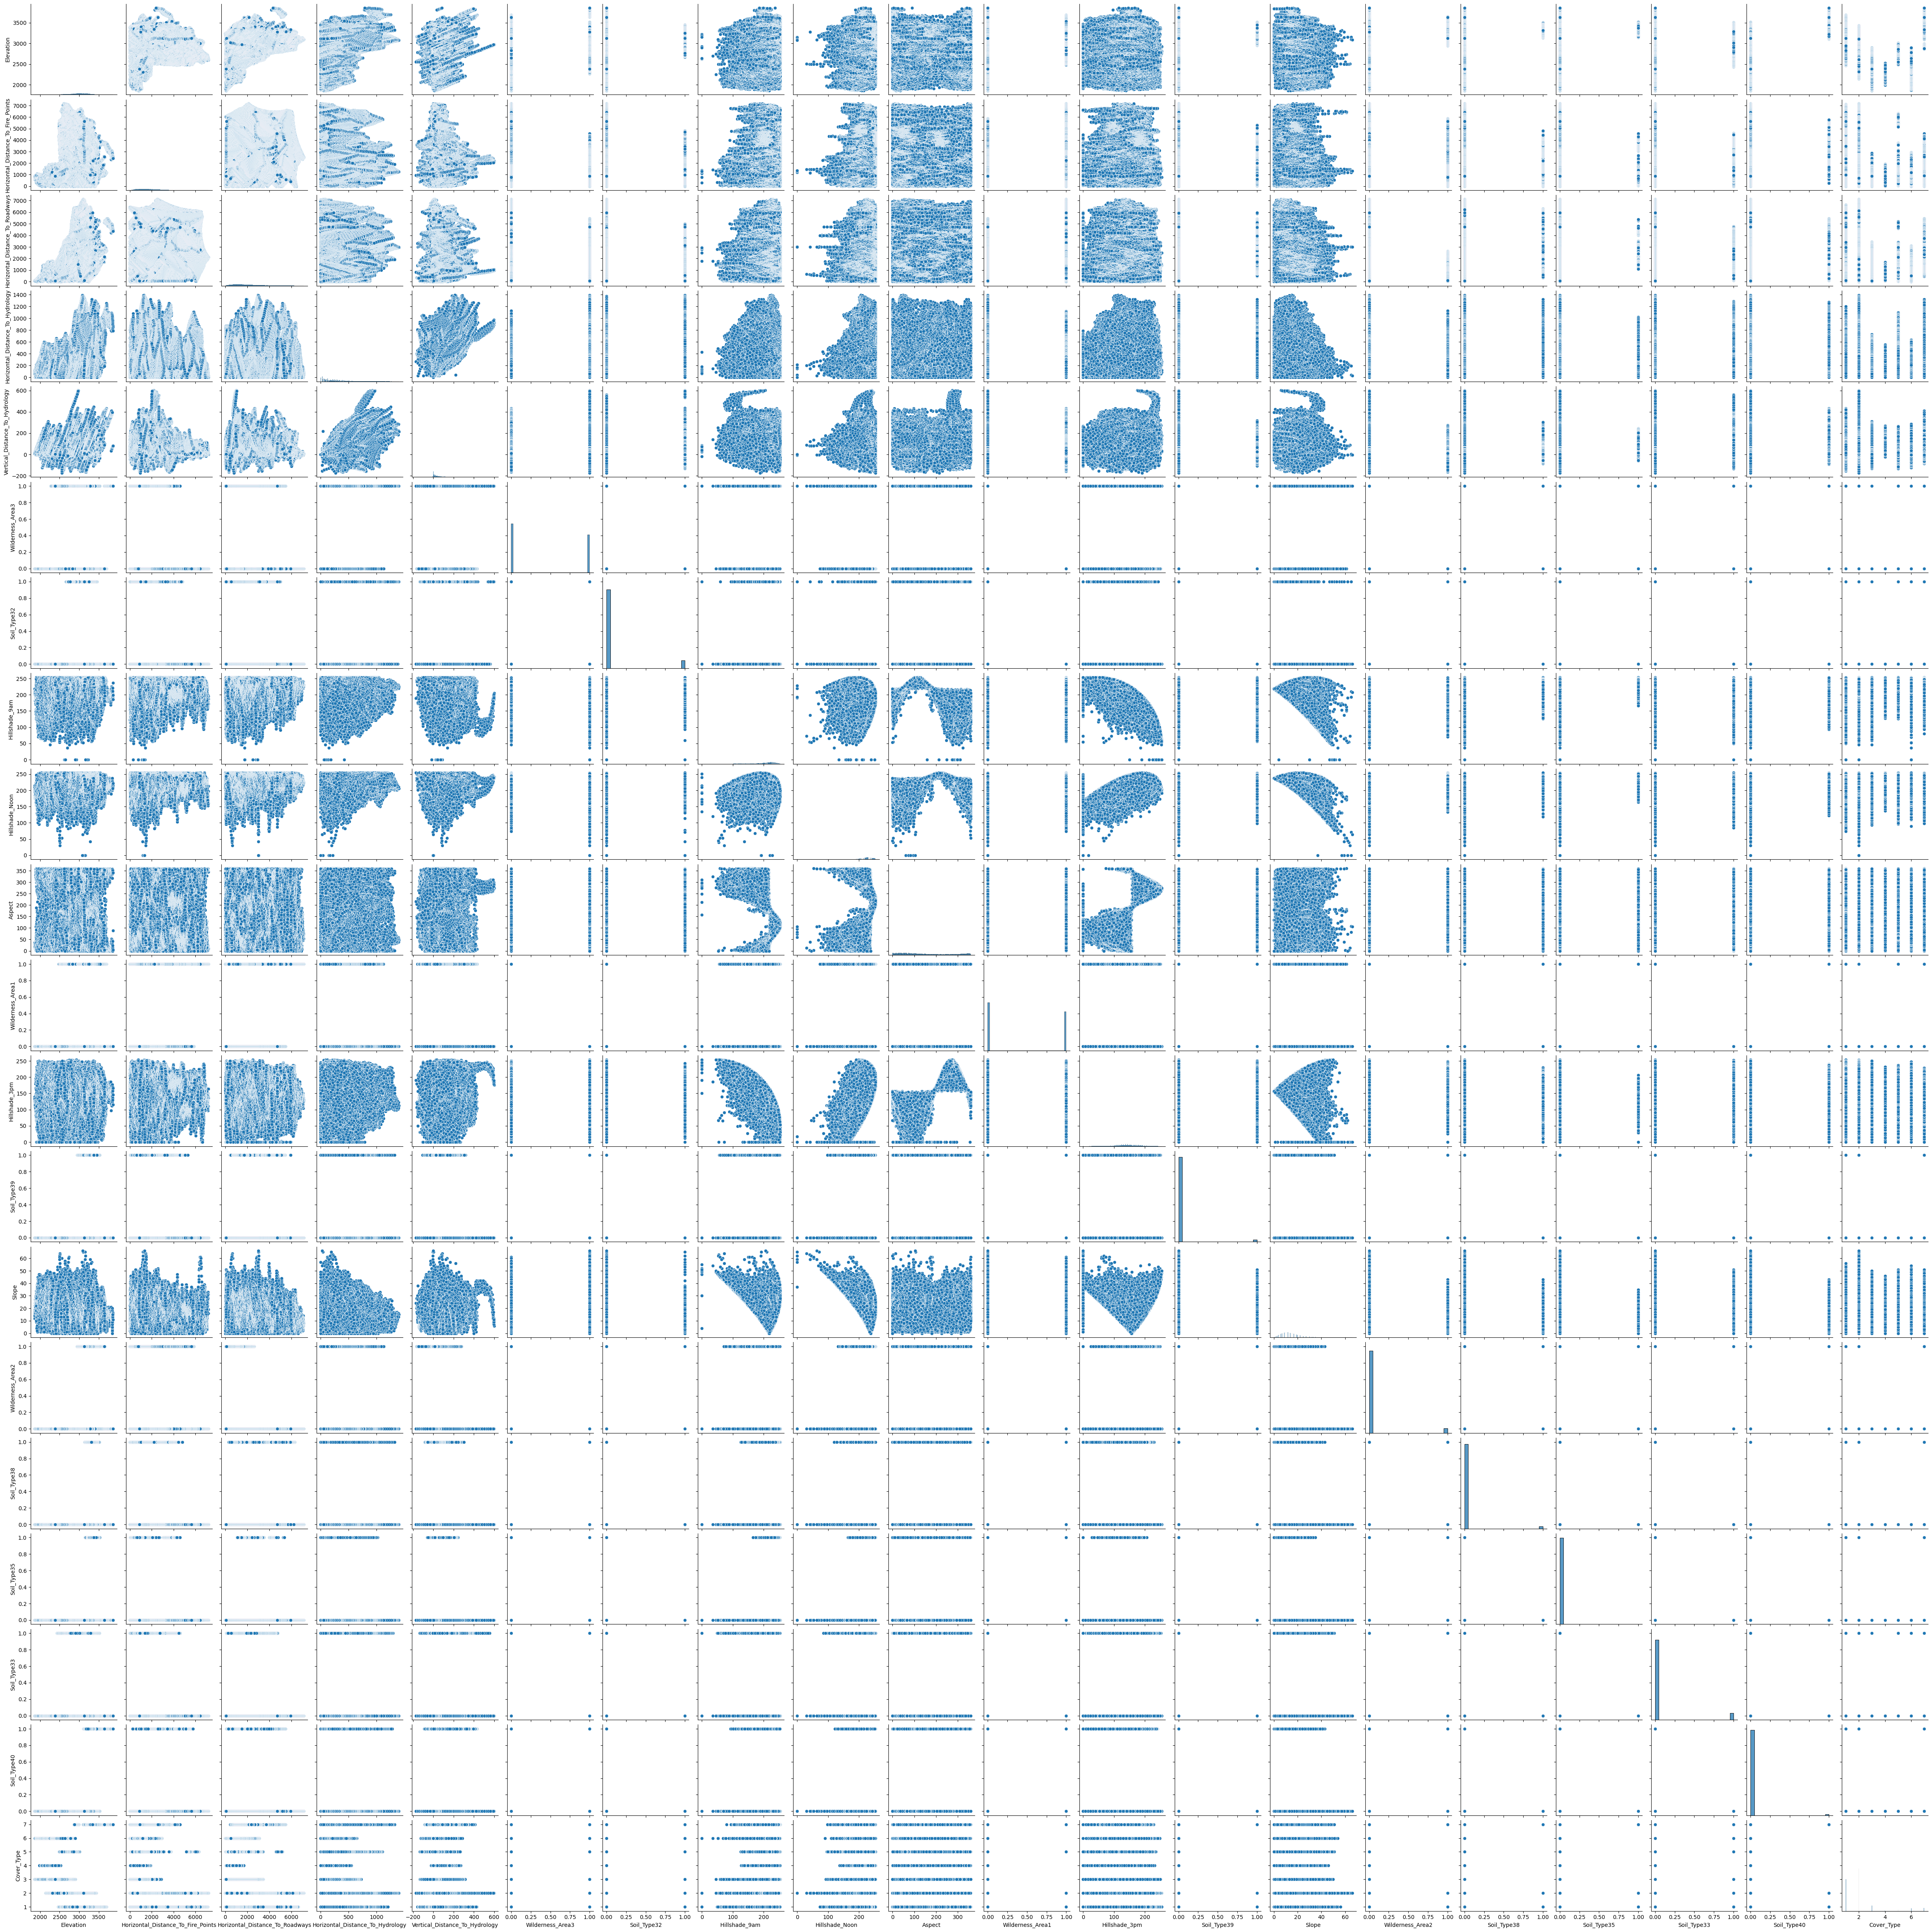

In [71]:
sns.pairplot(df_filtrado)
plt.show()

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_normalizado=scaler.fit_transform(df_filtrado.iloc[:, :-1])

df_normalizado=pd.DataFrame(x_normalizado, columns=df_filtrado.columns[:-1])
df_normalizado["Cover_type"]=y

df_normalizado

Elevation  Horizontal_Distance_To_Fire_Points  \
0        0.365683                            0.867838   
1        0.472736                            0.853339   
2        0.463232                            0.865886   
3        0.368184                            0.860449   
4        0.360180                            0.840792   
...           ...                                 ...   
581006   0.268634                            0.116688   
581007   0.266133                            0.117803   
581008   0.263632                            0.119058   
581009   0.262631                            0.120452   
581010   0.262131                            0.121985   

        Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                              0.054798                          0.151754   
1                              0.446817                          0.191840   
2                              0.434172                          0.173228   
3                              0.054939                          0.109520   
4                              0.009414                          0.214746   
...                                 ...                               ...   
581006                         0.015175                          0.060845   
581007                         0.013348                          0.047960   
581008                         0.012646                          0.042949   
581009                         0.012646                          0.042949   
581010                         0.009414                          0.042949   

        Vertical_Distance_To_Hydrology  Wilderness_Area3  Soil_Type32  \
0                             0.215762               0.0          0.0   
1                             0.307494               0.0          0.0   
2                             0.375969               0.0          0.0   
3                             0.222222               0.0          0.0   
4                             0.204134               0.0          0.0   
...                                ...               ...          ...   
581006                        0.245478               1.0          0.0   
581007                        0.239018               1.0          0.0   
581008                        0.232558               1.0          0.0   
581009                        0.229974               1.0          0.0   
581010                        0.228682               1.0          0.0   

        Hillshade_9am   Hillshade_Noon    Aspect  Wilderness_Area1  \
0             0.866142        0.925197  0.155556               1.0   
1             0.921260        0.937008  0.386111               1.0   
2             0.937008        0.937008  0.430556               1.0   
3             0.866142        0.921260  0.125000               1.0   
4             0.905512        0.933071  0.366667               1.0   
...                ...             ...       ...               ...   
581006        0.944882        0.933071  0.425000               0.0   
581007        0.944882        0.933071  0.422222               0.0   
581008        0.929134        0.948819  0.441667               0.0   
581009        0.905512        0.964567  0.472222               0.0   
581010        0.909449        0.960630  0.458333               0.0   

        Hillshade_3pm  Soil_Type39     Slope  Wilderness_Area2  Soil_Type38  \
0            0.594488          0.0  0.030303               0.0          0.0   
1            0.531496          0.0  0.136364               0.0          0.0   
2            0.480315          0.0  0.272727               0.0          0.0   
3            0.590551          0.0  0.030303               0.0          0.0   
4            0.551181          0.0  0.090909               0.0          0.0   
...               ...          ...       ...               ...          ...   
581006       0.464567          0.0  0.303030               0.0          0.0   
581007       0.468504          0.0  0.287879    

Ejercicio 3

Después de estandarizar los datos procedemos a crear el primer clasificador:
3.1 Divide el datset en training y en test:

Guarda el 20% de los datos para testeo.
random_state=100
3.2 Entrena un modelo de regresión logística:

Número máximo de iteraciones igual a 1000
random_state=100
3.3 Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)
Confusion matrix


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_filtrado.iloc[:, :-1], df_filtrado["Cover_Type"], test_size=0.2, random_state=100)
modelo_logistico = LogisticRegression(max_iter=1000, random_state=100)
modelo_logistico.fit(X_train, y_train)
y_pred = modelo_logistico.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
classification_report = classification_report(y_test, y_pred, zero_division=0)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-score:", f1score)
print("Classification Report:")
print(classification_report)
print("Confusion Matrix:")
print(confusion_mat)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6831837388019242
F1-score: 0.6568610810684976
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.70      0.68     42680
           2       0.71      0.79      0.75     56417
           3       0.61      0.65      0.63      7136
           4       0.59      0.29      0.38       578
           5       0.00      0.00      0.00      1873
           6       0.22      0.02      0.04      3400
           7       0.37      0.03      0.05      4119

    accuracy                           0.68    116203
   macro avg       0.45      0.35      0.36    116203
weighted avg       0.65      0.68      0.66    116203

Confusion Matrix:
[[29687 12824     3     0     0     0   166]
 [10730 44714   901     1     2    43    26]
 [    0  2157  4624    99     0   256     0]
 [    0    15   397   165     0     1     0]
 [   19  1841    13     0     0     0     0]
 [    0  1673  1626    17     0    84     0]
 [ 3891   114     0     0     0   